# Basic Interferometry: Tracing a Signal

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SIZE = 10000
t = np.arange(SIZE) * 0.5e-9 # time step of 0.5 us = 1/(2 MHz)
e_A = np.random.normal(size=SIZE)
e_B = 0.5 * np.random.normal(size=SIZE)

In [3]:
print np.average(e_A * e_B), np.average(e_A*e_A), np.average(e_B*e_B)

-0.0040655548917999 1.0202917290774718 0.25270936938595046


In [13]:
fqs = np.fft.fftfreq(t.size, np.median(np.diff(t)))
tau_A = 2e-9
tau_B = -30e-9
e_A_dly = np.fft.ifft(np.fft.fft(e_A) * np.exp(2j*np.pi*tau_A*fqs))
e_B_dly = np.fft.ifft(np.fft.fft(e_B) * np.exp(2j*np.pi*tau_B*fqs))

<IPython.core.display.Javascript object>


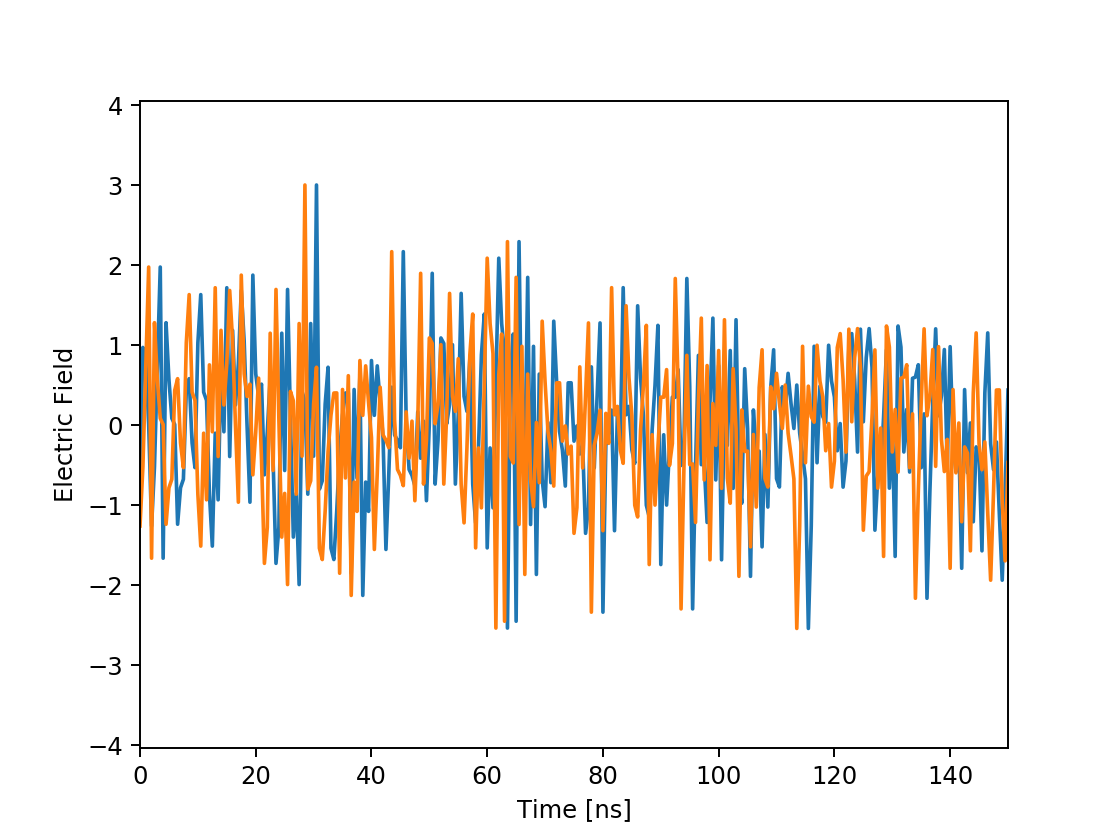

(0, 150)

In [14]:
plt.figure()
plt.plot(t * 1e9, e_A)
plt.plot(t * 1e9, e_A_dly)
plt.ylabel('Electric Field')
plt.xlabel('Time [ns]')
plt.xlim(0,150)

In [16]:
v1 = e_A_dly + e_B_dly
v2 = e_A + e_B

In [17]:
V12 = np.fft.fft(v1) * np.conj(np.fft.fft(v2))

<IPython.core.display.Javascript object>


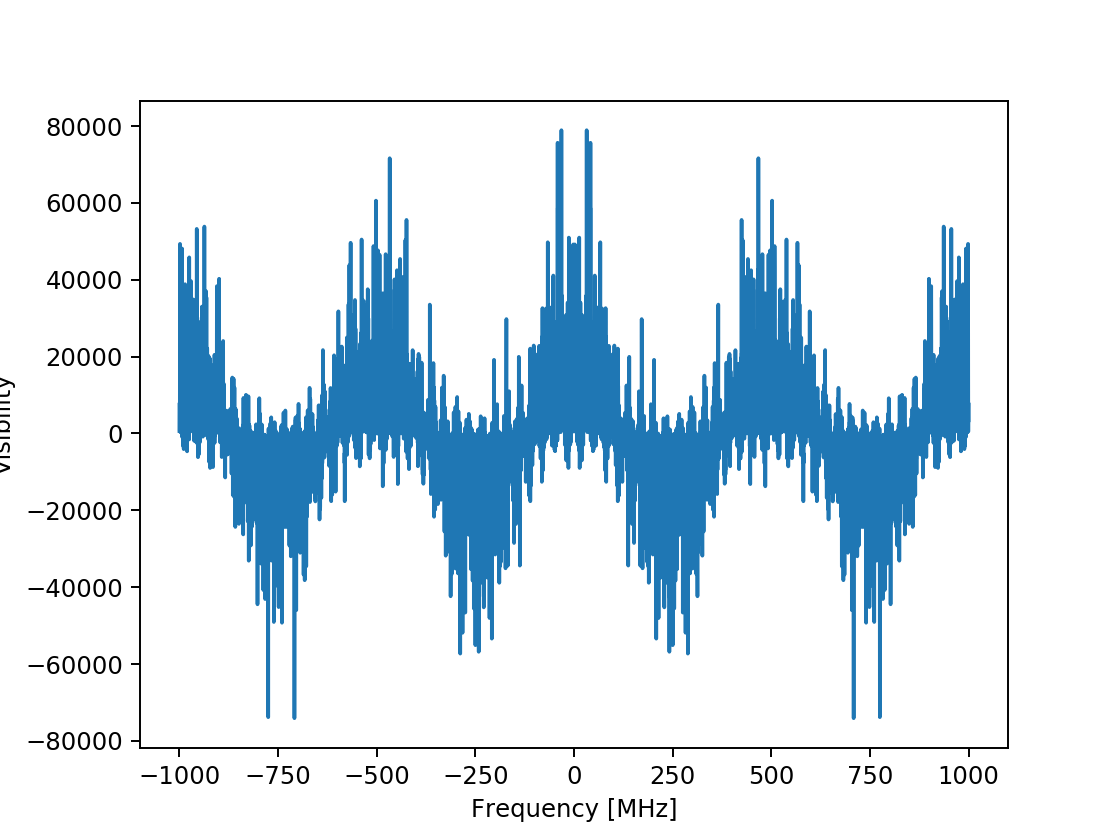

Text(0.5,0,'Frequency [MHz]')

In [18]:
plt.figure()
plt.plot(np.fft.fftshift(fqs) / 1e6, np.fft.fftshift(V12))
plt.ylabel('Visibility')
plt.xlabel('Frequency [MHz]')

<IPython.core.display.Javascript object>


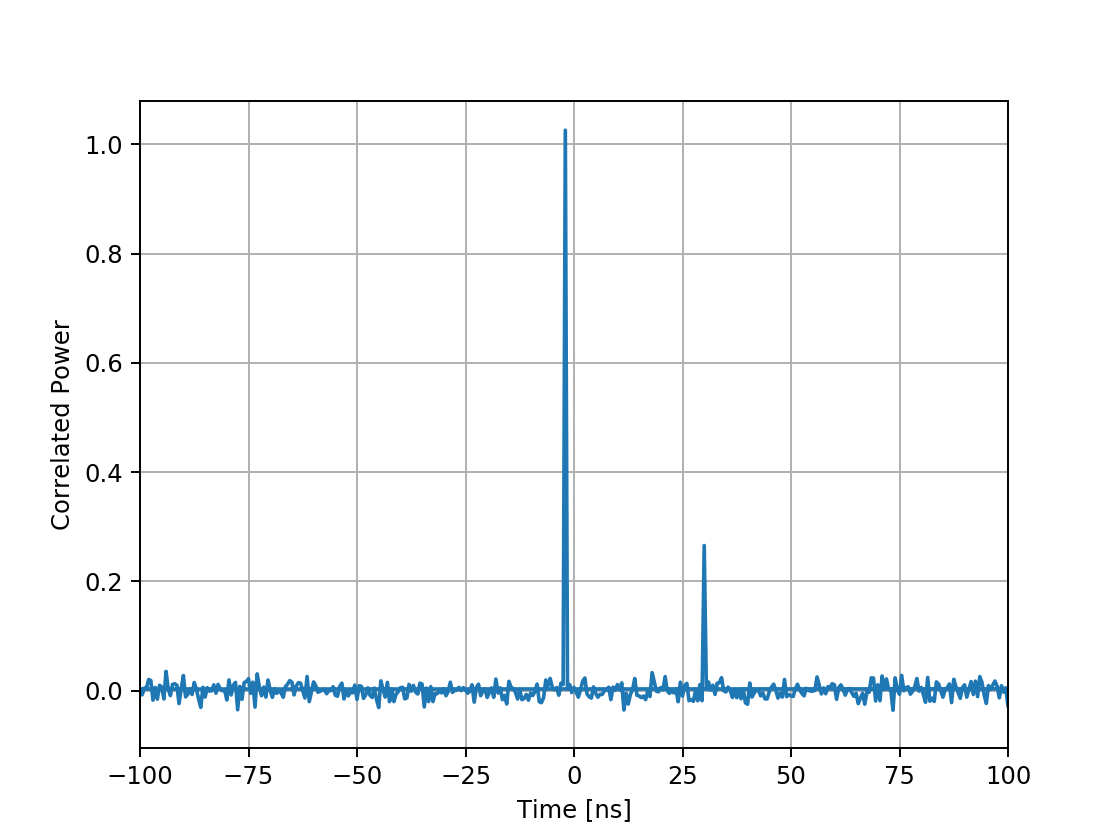

In [19]:
taus = np.fft.fftfreq(fqs.size, fqs[1]-fqs[0])
plt.figure()
plt.plot(taus * 1e9, np.fft.ifft(V12) / SIZE)
plt.ylabel('Correlated Power')
plt.xlabel('Time [ns]')
plt.xlim(-100, 100)
plt.grid()